**Data**

In [2]:
#@title Run this code to get started
%tensorflow_version 2.x
%pip install -q transformers

from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

!pip install anvil-uplink
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/train'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/valid'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/test'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/vocab.intent'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/vocab.slot'

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 68.8 MB/s 
     |████████████████████████████████| 7.6 MB 50.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 228 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45230 sha256=c25eade68021485d76c72bdeab0027921b9e324e7bafbd9d4c2540acbb0a1442
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


train               100%[===================>]   1.71M  --.-KB/s    in 0.01s   
valid               100%[===================>]  96.30K  --.-KB/s    in 0.001s  
test                100%[===================>]  94.49K  --.-KB/s    in 0.001s  
vocab.intent        100%[===================>]      99  --.-KB/s    in 0s      
vocab.slot          100%[===================>]     994  --.-KB/s    in 0s      


In [3]:
import anvil.server
# TODO: Create an anvil project and replace string with your uplink key
anvil.server.connect("KFZKKUDHYWDXMUEWMT2RRDL3-KIQH4V4R37ZPUM3J")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [4]:
# Prints vocab.intent
intent_lines = Path("vocab.intent").read_text().strip().splitlines()
for line in intent_lines:
  print(line)
print("\nThere are {} possible classes for the sentence level prediction task.".format(len(intent_lines)))

AddToPlaylist
BookRestaurant
GetWeather
PlayMusic
RateBook
SearchCreativeWork
SearchScreeningEvent

There are 7 possible classes for the sentence level prediction task.


In [5]:
# Prints vocab.slot
slot_lines = Path("vocab.slot").read_text().strip().splitlines()
for line in slot_lines:
  print(line)
print("\nThere are {} possible classes for the word level prediction task.".format(len(slot_lines)))

B-album
B-artist
B-best_rating
B-city
B-condition_description
B-condition_temperature
B-country
B-cuisine
B-current_location
B-entity_name
B-facility
B-genre
B-geographic_poi
B-location_name
B-movie_name
B-movie_type
B-music_item
B-object_location_type
B-object_name
B-object_part_of_series_type
B-object_select
B-object_type
B-party_size_description
B-party_size_number
B-playlist
B-playlist_owner
B-poi
B-rating_unit
B-rating_value
B-restaurant_name
B-restaurant_type
B-served_dish
B-service
B-sort
B-spatial_relation
B-state
B-timeRange
B-track
B-year
I-album
I-artist
I-city
I-country
I-cuisine
I-current_location
I-entity_name
I-facility
I-genre
I-geographic_poi
I-location_name
I-movie_name
I-movie_type
I-music_item
I-object_location_type
I-object_name
I-object_part_of_series_type
I-object_select
I-object_type
I-party_size_description
I-playlist
I-playlist_owner
I-poi
I-restaurant_name
I-restaurant_type
I-served_dish
I-service
I-sort
I-spatial_relation
I-state
I-timeRange
I-track
O

There

In [6]:
train_lines = Path("train").read_text().strip().splitlines()
for line in train_lines[:3]:
  print(line)

Add:O Don:B-entity_name and:I-entity_name Sherri:I-entity_name to:O my:B-playlist_owner Meditate:B-playlist to:I-playlist Sounds:I-playlist of:I-playlist Nature:I-playlist playlist:O <=> AddToPlaylist
put:O United:B-entity_name Abominations:I-entity_name onto:O my:B-playlist_owner rare:B-playlist groove:I-playlist playlist:O <=> AddToPlaylist
add:O the:O tune:B-music_item by:O misato:B-artist watanabe:I-artist to:O the:O Trapeo:B-playlist playlist:O <=> AddToPlaylist


In [7]:
def parse_line(line):
    data, intent_label = line.split(" <=> ")
    items = data.split()
    words = [item.rsplit(":", 1)[0]for item in items]
    word_labels = [item.rsplit(":", 1)[1]for item in items]
    return {
        "intent_label": intent_label, ### YOUR CODE HERE ###, 
        "words": " ".join(words),
        "word_labels": " ".join(word_labels), ### YOUR CODE HERE ###,
        "length": len(words), ### YOUR CODE HERE ###,
    }

parse_line(train_lines[0]) ### YOUR CODE HERE ###

{'intent_label': 'AddToPlaylist',
 'words': 'Add Don and Sherri to my Meditate to Sounds of Nature playlist',
 'word_labels': 'O B-entity_name I-entity_name I-entity_name O B-playlist_owner B-playlist I-playlist I-playlist I-playlist I-playlist O',
 'length': 12}

In [8]:
import pandas as pd

parsed_train = [parse_line(line) for line in train_lines]
df_train = pd.DataFrame([p for p in parsed_train if p is not None])
df_train

,intent_label,words,word_labels,length
0,AddToPlaylist,Add Don and Sherri to my Meditate to Sounds of...,O B-entity_name I-entity_name I-entity_name O ...,12
1,AddToPlaylist,put United Abominations onto my rare groove pl...,O B-entity_name I-entity_name O B-playlist_own...,8
2,AddToPlaylist,add the tune by misato watanabe to the Trapeo ...,O O B-music_item O B-artist I-artist O O B-pla...,10
3,AddToPlaylist,add this artist to my this is miguel bosé play...,O O B-music_item O B-playlist_owner B-playlist...,10
4,AddToPlaylist,add heresy and the hotel choir to the evening ...,O B-entity_name I-entity_name I-entity_name I-...,11
...,...,...,...,...
13079,SearchScreeningEvent,find a Consolidated Theatres showing The Good ...,O O B-location_name I-location_name O B-movie_...,10
13080,SearchScreeningEvent,where can i see animated movies in the neighbo...,O O O O B-movie_type I-movie_type B-spatial_re...,9
13081,SearchScreeningEvent,Showtimes for animated movies in the area .,O O B-movie_type I-movie_type B-spatial_relati...,8
13082,SearchScreeningEvent,Which animated movies are playing at Megaplex ...,O B-movie_type I-movie_type O O O B-location_n...,11


In [9]:
df_train.groupby("intent_label").count()[['words']]

,words
intent_label,
AddToPlaylist,1842
BookRestaurant,1873
GetWeather,1900
PlayMusic,1900
RateBook,1856
SearchCreativeWork,1854
SearchScreeningEvent,1859


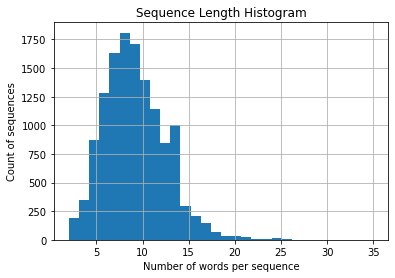

In [10]:
df_train.hist("length", bins=30)
plt.title("Sequence Length Histogram")
plt.xlabel("Number of words per sequence")
plt.ylabel("Count of sequences")
plt.show()

In [11]:
# Text representation of the histogram of sequence lengths.
count, division = np.histogram(df_train['length'], bins=30)

for i in range(len(count)):
  print("There are {} sequences that have between {} and {} number of words.".format(count[i], round(division[i],3), round(division[i+1],3)))

There are 190 sequences that have between 2.0 and 3.1 number of words.
There are 351 sequences that have between 3.1 and 4.2 number of words.
There are 873 sequences that have between 4.2 and 5.3 number of words.
There are 1281 sequences that have between 5.3 and 6.4 number of words.
There are 1632 sequences that have between 6.4 and 7.5 number of words.
There are 1809 sequences that have between 7.5 and 8.6 number of words.
There are 1713 sequences that have between 8.6 and 9.7 number of words.
There are 1398 sequences that have between 9.7 and 10.8 number of words.
There are 1144 sequences that have between 10.8 and 11.9 number of words.
There are 845 sequences that have between 11.9 and 13.0 number of words.
There are 1003 sequences that have between 13.0 and 14.1 number of words.
There are 293 sequences that have between 14.1 and 15.2 number of words.
There are 211 sequences that have between 15.2 and 16.3 number of words.
There are 145 sequences that have between 16.3 and 17.4 num

In [12]:
avg_len = round(df_train['length'].mean(), 3)
print("Average sequence length: {} words per sequence".format(avg_len))

max_len = max(df_train['length'])
print("Maximum sequence length: {} words per sequence".format(max_len))

Average sequence length: 9.143 words per sequence
Maximum sequence length: 35 words per sequence


In [13]:
valid_lines = Path("valid").read_text().strip().splitlines()
test_lines = Path("test").read_text().strip().splitlines()

df_valid = pd.DataFrame([parse_line(line) for line in valid_lines])
df_test = pd.DataFrame([parse_line(line) for line in test_lines])

In [14]:
train_num = len(df_train)
val_num = len(df_valid)
test_num = len(df_test)
print(train_num, val_num, test_num)
total_num = train_num + val_num + test_num

print("{}%".format(round(train_num / total_num * 100, 3)))
print("{}%".format(round(val_num / total_num * 100, 3)))
print("{}%".format(round(test_num / total_num * 100, 3)))

13084 700 700
90.334%
4.833%
4.833%


In [15]:
df_valid.groupby("intent_label").count()[['words']]
df_test.groupby("intent_label").count()[['words']]

,words
intent_label,
AddToPlaylist,100
BookRestaurant,100
GetWeather,100
PlayMusic,100
RateBook,100
SearchCreativeWork,100
SearchScreeningEvent,100


**BERT**

In [16]:
from transformers import BertTokenizer

model_name = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [17]:
first_sentence = df_train.iloc[0]["words"]
print(first_sentence)
print("This sentence contains {} words.".format(len(first_sentence.split(" "))))

Add Don and Sherri to my Meditate to Sounds of Nature playlist
This sentence contains 12 words.


In [18]:
tokens = tokenizer.tokenize(first_sentence)
for t in tokens:
  print(t)
print("\nThis sentence turns into {} tokens.".format(len(tokens)))

Ad
##d
Don
and
She
##rri
to
my
Me
##dit
##ate
to
Sounds
of
Nature
play
##list

This sentence turns into 17 tokens.


In [19]:
bert_vocab_items = list(tokenizer.vocab.items())
bert_vocab_items[:10]

[('[PAD]', 0),
 ('[unused1]', 1),
 ('[unused2]', 2),
 ('[unused3]', 3),
 ('[unused4]', 4),
 ('[unused5]', 5),
 ('[unused6]', 6),
 ('[unused7]', 7),
 ('[unused8]', 8),
 ('[unused9]', 9)]

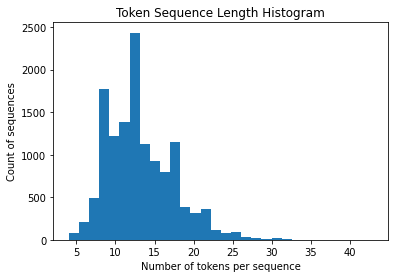

In [20]:
train_sequence_lengths = [len(tokenizer.encode(text))
                          for text in df_train["words"]]
plt.hist(train_sequence_lengths, bins=30)


plt.xlabel("Number of tokens per sequence")
plt.ylabel("Count of sequences")
plt.title("Token Sequence Length Histogram")
plt.show()

In [21]:
def encode_dataset(text_sequences):
    # Create token_ids array (initialized to all zeros), where 
    # rows are a sequence and columns are encoding ids
    # of each token in given sequence.
    token_ids = np.zeros(shape=(len(text_sequences), max_token_len),
                         dtype=np.int32)
    
    for i, text_sequence in enumerate(text_sequences):
        encoded = tokenizer.encode(text_sequence)
        token_ids[i, 0:len(encoded)] = encoded

    attention_masks = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_masks": attention_masks}

In [22]:
max_token_len = max(train_sequence_lengths)
print("Maximum tokenized sequence length: {} tokens per sequence".format(max_token_len))

Maximum tokenized sequence length: 43 tokens per sequence


In [23]:
encoded_valid = encode_dataset(df_valid["words"])
encoded_test = encode_dataset(df_test["words"])

In [24]:
intent_names = Path("vocab.intent").read_text().split()
intent_map = dict((label, idx) for idx, label in enumerate(intent_names))
intent_map

{'AddToPlaylist': 0,
 'BookRestaurant': 1,
 'GetWeather': 2,
 'PlayMusic': 3,
 'RateBook': 4,
 'SearchCreativeWork': 5,
 'SearchScreeningEvent': 6}

In [25]:
intent_train = df_train["intent_label"].map(intent_map).values
intent_train

array([0, 0, 0, ..., 6, 6, 6])

In [26]:
intent_valid = df_valid["intent_label"].map(intent_map).values
intent_test = df_test["intent_label"].map(intent_map).values

In [27]:
from transformers import TFBertModel

# recall that we earlier defined model_name to be "bert-base-cased"
base_bert_model = TFBertModel.from_pretrained(model_name)
base_bert_model.summary()

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [28]:
outputs = base_bert_model(encoded_valid["input_ids"])
len(outputs)

2

In [29]:
base_bert_model.bert.pooler.dense

In [30]:
token_features = outputs[0]
token_features.shape
sentence_representation = outputs[1]
sentence_representation.shape

TensorShape([700, 768])

In [31]:
first_token_states = token_features[:, 0]
pooled_outputs = base_bert_model.bert.pooler.dense(first_token_states)
pooled_outputs.shape

TensorShape([700, 768])

In [32]:
np.allclose(pooled_outputs, sentence_representation)

True

In [33]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


class IntentClassificationModel(tf.keras.Model):

    def __init__(self, intent_num_labels=None,
                 dropout_prob=0.1):
        super().__init__(name="intent_classifier")

        # Load the pretrained BERT model in the constructor
        self.bert = base_bert_model

        # TODO: Specify the dropout
        self.dropout = Dropout(dropout_prob) ### YOUR CODE HERE ###

        # TODO: define a Dense classification layer which will compute
        # the intent for each sequence in a batch. The number of 
        # output classes is given by the intent_num_labels parameter.
        # Use the default linear activation (no softmax) to compute logits.
        # The softmax normalization will be computed in the loss function
        # instead of the model.
        
        self.intent_classifier = Dense(intent_num_labels)  ### YOUR CODE HERE ###

    def call(self, inputs, **kwargs):
        # Use the pretrained model to extract features from our encoded inputs:
        tokens_output, pooled_output = self.bert(inputs, **kwargs, return_dict=False)

        # The second output of the main BERT layer has shape 
        # (batch_size, output_dim) and gives the pooled representation
        # for the full sequence (from the hidden state corresponding to [CLS]).
        pooled_output = self.dropout(pooled_output, \
                                     training=kwargs.get("training", False))
        
        # TODO: use classifier layer to compute logits from pooled features.
        intent_logits = self.intent_classifier(pooled_output) ### YOUR CODE HERE ###

        return intent_logits

# TODO: create an instantiation of this class and pass in the correct
# parameter for intent_num_labels.
### YOUR CODE HERE ###
intent_model = IntentClassificationModel(intent_num_labels=len(intent_map))

intent_model.compile(optimizer=Adam(learning_rate=3e-5, epsilon=1e-08),
                     loss=SparseCategoricalCrossentropy(from_logits=True),
                     metrics=[SparseCategoricalAccuracy('accuracy')], run_eagerly=True)


In [34]:
encoded_train = encode_dataset(df_train["words"])

In [35]:
history = intent_model.fit(encoded_train["input_ids"], intent_train, epochs=1, batch_size=32, \
                           validation_data=(encoded_valid["input_ids"], intent_valid))


409/409 [==============================] - 201s 491ms/step - loss: 0.3121 - accuracy: 0.8869 - val_loss: 0.0392 - val_accuracy: 0.9914


In [36]:
def classify(text, intent_names):
    inputs = tf.constant(tokenizer.encode(text))[None, :]  # batch_size = 1
    class_id = intent_model(inputs).numpy().argmax(axis=1)[0]
    return intent_names[class_id]

In [37]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

error_count = 0
for i in range(len(df_test)):
  words = " ".join(df_test[i:i+1]["words"].to_string().split(" ")[4:])
  predicted = classify(words, intent_names)
  true = df_test[i:i+1]["intent_label"].to_string().split(" ")[-1]

  if predicted != true:
    error_count += 1
    print("Incorrectly predicted {} but the correct label is {} for the sequence {}." \
          .format(predicted, true, words))
  if error_count == 20:
    break

Incorrectly predicted RateBook but the correct label is AddToPlaylist for the sequence Add the track to the drum & breaks playlist..
Incorrectly predicted GetWeather but the correct label is BookRestaurant for the sequence Book spot for 9.
Incorrectly predicted RateBook but the correct label is AddToPlaylist for the sequence I'd like to have this track onto my Classical ....
Incorrectly predicted GetWeather but the correct label is SearchScreeningEvent for the sequence show me the schedule for The Oblong Box.
Incorrectly predicted RateBook but the correct label is AddToPlaylist for the sequence I need to add baro ferret to the Urban Hits un....
Incorrectly predicted GetWeather but the correct label is PlayMusic for the sequence Please open Zvooq.
Incorrectly predicted GetWeather but the correct label is SearchScreeningEvent for the sequence What's the movie schedule.
Incorrectly predicted RateBook but the correct label is AddToPlaylist for the sequence I'd like for you to add bobby bro

**NER and Model**

In [38]:
#@title Run this code to get started
%tensorflow_version 2.x
%pip install -q transformers

import tensorflow as tf
from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from transformers import BertTokenizer
from transformers import TFBertModel
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

model_name = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)

# SNIPS_DATA_BASE_URL = (
#     "https://github.com/ogrisel/slot_filling_and_intent_detection_of_SLU/blob/"
#     "master/data/snips/"
# )
# for filename in ["train", "valid", "test", "vocab.intent", "vocab.slot"]:
#     path = Path(filename)
#     if not path.exists():
#       print(f"Downloading {filename}...")
#       urlretrieve(SNIPS_DATA_BASE_URL + filename + "?raw=true", path)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/train'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/valid'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/test'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/vocab.intent'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/vocab.slot'



def parse_line(line):
    data, intent_label = line.split(" <=> ")
    items = data.split()
    words = [item.rsplit(":", 1)[0]for item in items]
    word_labels = [item.rsplit(":", 1)[1]for item in items]
    return {
        "intent_label": intent_label, 
        "words": " ".join(words),
        "word_labels": " ".join(word_labels),
        "length": len(words),
    }

def encode_dataset(text_sequences):
    # Create token_ids array (initialized to all zeros), where 
    # rows are a sequence and columns are encoding ids
    # of each token in given sequence.
    token_ids = np.zeros(shape=(len(text_sequences), max_token_len),
                         dtype=np.int32)
    
    for i, text_sequence in enumerate(text_sequences):
        encoded = tokenizer.encode(text_sequence)
        token_ids[i, 0:len(encoded)] = encoded

    attention_masks = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_masks": attention_masks}


train_lines = Path("train").read_text().strip().splitlines()
valid_lines = Path("valid").read_text().strip().splitlines()
test_lines = Path("test").read_text().strip().splitlines()

df_train = pd.DataFrame([parse_line(line) for line in train_lines])
df_valid = pd.DataFrame([parse_line(line) for line in valid_lines])
df_test = pd.DataFrame([parse_line(line) for line in test_lines])

max_token_len = 43

encoded_train = encode_dataset(df_train["words"])
encoded_valid = encode_dataset(df_valid["words"])
encoded_test = encode_dataset(df_test["words"])

intent_names = Path("vocab.intent").read_text().split()
intent_map = dict((label, idx) for idx, label in enumerate(intent_names))
intent_train = df_train["intent_label"].map(intent_map).values
intent_valid = df_valid["intent_label"].map(intent_map).values
intent_test = df_test["intent_label"].map(intent_map).values

base_bert_model = TFBertModel.from_pretrained("bert-base-cased")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2022-11-20 20:52:48--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/train
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1793794 (1.7M) [application/octet-stream]
Saving to: ‘train.1’

train.1             100%[===================>]   1.71M  --.-KB/s    in 0.01s   

2022-11-20 20:52:48 (159 MB/s) - ‘train.1’ saved [1793794/1793794]

--2022-11-20 20:52:48--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Siri%20(Bert)%20Voice%20Commands/valid
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.12

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [39]:
slot_names = ["[PAD]"] + Path("vocab.slot").read_text().strip().splitlines()
slot_map = {}
for label in slot_names:
    slot_map[label] = len(slot_map)
slot_map

{'[PAD]': 0,
 'B-album': 1,
 'B-artist': 2,
 'B-best_rating': 3,
 'B-city': 4,
 'B-condition_description': 5,
 'B-condition_temperature': 6,
 'B-country': 7,
 'B-cuisine': 8,
 'B-current_location': 9,
 'B-entity_name': 10,
 'B-facility': 11,
 'B-genre': 12,
 'B-geographic_poi': 13,
 'B-location_name': 14,
 'B-movie_name': 15,
 'B-movie_type': 16,
 'B-music_item': 17,
 'B-object_location_type': 18,
 'B-object_name': 19,
 'B-object_part_of_series_type': 20,
 'B-object_select': 21,
 'B-object_type': 22,
 'B-party_size_description': 23,
 'B-party_size_number': 24,
 'B-playlist': 25,
 'B-playlist_owner': 26,
 'B-poi': 27,
 'B-rating_unit': 28,
 'B-rating_value': 29,
 'B-restaurant_name': 30,
 'B-restaurant_type': 31,
 'B-served_dish': 32,
 'B-service': 33,
 'B-sort': 34,
 'B-spatial_relation': 35,
 'B-state': 36,
 'B-timeRange': 37,
 'B-track': 38,
 'B-year': 39,
 'I-album': 40,
 'I-artist': 41,
 'I-city': 42,
 'I-country': 43,
 'I-cuisine': 44,
 'I-current_location': 45,
 'I-entity_name': 

In [40]:
def encode_token_labels(text_sequences, true_word_labels):
    encoded = np.zeros(shape=(len(text_sequences), max_token_len), dtype=np.int32)
    for i, (text_sequence, word_labels) in enumerate( \
            zip(text_sequences, true_word_labels)):
        encoded_labels = []
        for word, word_label in zip(text_sequence.split(), word_labels.split()):
            tokens = tokenizer.tokenize(word)
            encoded_labels.append(slot_map[word_label])
            expand_label = word_label.replace("B-", "I-")
            if not expand_label in slot_map:
                expand_label = word_label
            encoded_labels.extend([slot_map[expand_label]] * (len(tokens) - 1))
        encoded[i, 1:len(encoded_labels) + 1] = encoded_labels
    return encoded

In [41]:
class JointIntentAndSlotFillingModel(tf.keras.Model):

    def __init__(self, intent_num_labels=None, slot_num_labels=None,
                dropout_prob=0.1):
        super().__init__(name="joint_intent_slot")

        self.bert = base_bert_model
        
        # TODO: define the dropout, intent & slot classifier layers
        ### YOUR CODE HERE ###
        # Solution:
        self.dropout = Dropout(dropout_prob)
        self.intent_classifier = Dense(intent_num_labels,
                                       name="intent_classifier")
        self.slot_classifier = Dense(slot_num_labels,
                                     name="slot_classifier")

    def call(self, inputs, **kwargs):
        # Extract features from the inputs using pre-trained BERT.
        # TODO: what does the bert model return?
        tokens_output, pooled_output = self.bert(inputs, **kwargs, return_dict=False)

        # TODO: use the new layers to predict slot class (logits) for each
        # token position in input sequence (size: (batch_size, seq_len, slot_num_labels)).
        ### YOUR CODE HERE ###
        # Solution:
        tokens_output = self.dropout(tokens_output,
                                       training=kwargs.get("training", False))
        slot_logits = self.slot_classifier(tokens_output) 

        # TODO: define a second classification head for the sequence-wise
        # predictions (size: (batch_size, intent_num_labels)).
        # (Hint: create pooled_output to get the intent_logits).
        # Remember that the 2nd output of the main BERT layer is size 
        # (batch_size, output_dim) & gives a "pooled" representation for 
        # full sequence from hidden state corresponding to [CLS]).
        ### YOUR CODE HERE ###
        # Solution:
        pooled_output = self.dropout(pooled_output,
                                     training=kwargs.get("training", False))
        intent_logits = self.intent_classifier(pooled_output)

        return slot_logits, intent_logits

# TODO: create an instantiation of this model
joint_model = JointIntentAndSlotFillingModel( \
    intent_num_labels=len(intent_map), slot_num_labels=len(slot_map))

In [42]:
losses = [SparseCategoricalCrossentropy(from_logits=True),
          SparseCategoricalCrossentropy(from_logits=True)]
          
joint_model.compile(optimizer=Adam(learning_rate=3e-5, epsilon=1e-08),
                    loss=losses,
                    metrics=[SparseCategoricalAccuracy('accuracy')], run_eagerly=True)

In [43]:
slot_train = encode_token_labels(df_train["words"], df_train["word_labels"])
slot_valid = encode_token_labels(df_valid["words"], df_valid["word_labels"])
slot_test = encode_token_labels(df_test["words"], df_test["word_labels"])

In [44]:
history = joint_model.fit(encoded_train["input_ids"], (slot_train, intent_train), \
    validation_data=(encoded_valid["input_ids"], (slot_valid, intent_valid)), \
    epochs=1, batch_size=32)

409/409 [==============================] - 219s 534ms/step - loss: 0.5023 - output_1_loss: 0.2831 - output_2_loss: 0.2192 - output_1_accuracy: 0.9363 - output_2_accuracy: 0.9280 - val_loss: 0.0995 - val_output_1_loss: 0.0479 - val_output_2_loss: 0.0516 - val_output_1_accuracy: 0.9862 - val_output_2_accuracy: 0.9886


In [45]:
def show_predictions(text, intent_names, slot_names):
    inputs = tf.constant(tokenizer.encode(text))[None, :]  # batch_size = 1
    outputs = joint_model(inputs)
    slot_logits, intent_logits = outputs
    slot_ids = slot_logits.numpy().argmax(axis=-1)[0, 1:-1]
    intent_id = intent_logits.numpy().argmax(axis=-1)[0]
    print("## Intent:", intent_names[intent_id])
    print("## Slots:")
    for token, slot_id in zip(tokenizer.tokenize(text), slot_ids):
        print(f"{token:>10} : {slot_names[slot_id]}")

In [46]:
def decode_predictions(text, intent_names, slot_names,
                       intent_id, slot_ids):
    info = {"intent": intent_names[intent_id]}
    collected_slots = {}
    active_slot_words = []
    active_slot_name = None
    for word in text.split():
        tokens = tokenizer.tokenize(word)
        current_word_slot_ids = slot_ids[:len(tokens)]
        slot_ids = slot_ids[len(tokens):]
        current_word_slot_name = slot_names[current_word_slot_ids[0]]
        if current_word_slot_name == "O":
            if active_slot_name:
                collected_slots[active_slot_name] = " ".join(active_slot_words)
                active_slot_words = []
                active_slot_name = None
        else:
            # Naive BIO: handling: treat B- and I- the same...
            new_slot_name = current_word_slot_name[2:]
            if active_slot_name is None:
                active_slot_words.append(word)
                active_slot_name = new_slot_name
            elif new_slot_name == active_slot_name:
                active_slot_words.append(word)
            else:
                collected_slots[active_slot_name] = " ".join(active_slot_words)
                active_slot_words = [word]
                active_slot_name = new_slot_name
    if active_slot_name:
        collected_slots[active_slot_name] = " ".join(active_slot_words)
    info["slots"] = collected_slots
    return info

In [47]:
def nlu(text, intent_names, slot_names):
    inputs = tf.constant(tokenizer.encode(text))[None, :]  # batch_size = 1
    outputs = joint_model(inputs)
    slot_logits, intent_logits = outputs
    slot_ids = slot_logits.numpy().argmax(axis=-1)[0, 1:-1]
    intent_id = intent_logits.numpy().argmax(axis=-1)[0]

    return decode_predictions(text, intent_names, slot_names, intent_id, slot_ids)

In [48]:
@anvil.server.callable
def call_model(text):
  return nlu(text, intent_names, slot_names)

#OPTIONAL TODO: make the output prettier for audience


In [49]:
call_model("book a table for two at the Le Ritz Hotel Friday night") #example for testing call_model fn


{'intent': 'BookRestaurant',
 'slots': {'party_size_number': 'two', 'restaurant_name': 'Le Ritz Hotel'}}

In [50]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored